### Script 
- Purpose: To scrap #Airbnb tag data from Twitter
- Not using for the final solution.
    - Path: Data/raw

In [ ]:
!pip install tweepy
!pip install textblob
!pip install pycountry
!pip install wordcloud
!pip install nltk

!pip install webdriver-manager

### References:
- https://towardsdatascience.com/how-to-scrape-more-information-from-tweets-on-twitter-44fd540b8a1f
- https://medium.com/analytics-vidhya/fetch-tweets-using-their-ids-with-tweepy-twitter-api-and-python-ee7a22dcb845
- https://towardsdatascience.com/an-extensive-guide-to-collecting-tweets-from-twitter-api-v2-for-academic-research-using-python-3-518fcb71df2a

In [2]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/sudhavijayakumar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
root = 'Data/raw/'

### Read & Save Raw tweets

In [3]:
import os
import tweepy as tw
import pandas as pd
import time

In [4]:
def limit_handled(cursor, list_name):
    while True:
        try:
            yield cursor.next()
            # Catch Twitter API rate limit exception and wait for 15 minutes
        except tw.RateLimitError:
            print("\nData points in list = {}".format(len(list_name)))
            print('Hit Twitter API rate limit.')
            for i in range(3, 0, -1):
                print("Wait for {} mins.".format(i * 5))
                time.sleep(5 * 60)
        # Catch any other Twitter API exceptions
        except tw.error.TweepError:
            print('\nCaught TweepError exception' )

In [5]:
consumer_key= 'NrblJQ39ZvPLl69EaOg92HymT'
consumer_secret= 'JupK3xdr8WEECrBWszVDd1HhFgznbfghltji1pFYdOUhHiPU9k'
access_token= '1428909779926151176-LpcExBSfWczJ91flWZiV6YGNfAw4pX'
access_token_secret= 'wYsLw0dmG9V8SrVaeUsqwBp3FBYxuza2B0t8KuSpwaOEK'

In [6]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [7]:
# Define the search term and the date_since date as variables
search_words = "#airbnb"
date_since = "2021-5-1"

In [8]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since, tweet_mode="extended").items(200)

In [11]:
# Pulling information from tweets iterable object.
# Add or remove tweet information you want in the below list comprehension.
tweets_list = [[tweet.full_text, tweet.created_at, tweet.id_str, tweet.user.screen_name] for tweet in tweets]

# Creation of dataframe from tweets_list.
# Add or remove columns as you remove tweet information.
tweets_df = pd.DataFrame(tweets_list,columns=['Tweet', 'Datetime', 'Id', 'Name'])


In [12]:
tweets_df

,Tweet,Datetime,Id,Name
0,"1636955279 Exceptional Value, Beautiful, and S...",2021-11-15 05:47:40,1460122306185945090,TaylorSlowe
1,Beautiful bed with 10 inches thickness spring ...,2021-11-15 05:42:40,1460121050587488264,CentreSleep
2,RT @BoostlyUK: How to boost your Airbnb listin...,2021-11-15 05:35:28,1460119238056808453,johnpaulcusick
3,RT @TheTyTierra: I stopped dancing a while ago...,2021-11-15 05:18:36,1460114990791340032,King_Meeake
4,#Airbnb went to a parliamentary inquiry + spen...,2021-11-15 05:17:47,1460114787505885188,termite_terry
...,...,...,...,...
195,Good Vibes Celebration w/ Private Entrance #wp...,2021-11-14 07:43:12,1459788994036867074,IamRoodnie
196,RT @BarnardCCottage: Giveaway day is here! \n\...,2021-11-14 07:43:10,1459788984733908995,GarethD07751154
197,Looking for car rental for your holiday or bus...,2021-11-14 07:35:06,1459786956632698880,Comparison_Site
198,RT @BarnardCCottage: Giveaway day is here! \n\...,2021-11-14 07:04:59,1459779378590756865,SuzanneGosney2


In [14]:
tweets_df.to_csv(root+'Twitter_Data.csv')#, mode='a')

### Sentiment analysis
#### Reference: 
https://towardsdatascience.com/step-by-step-twitter-sentiment-analysis-in-python-d6f650ade58d

In [16]:
df = pd.read_csv (root+'Twitter_Data.csv',sep=',')
del df['Unnamed: 0']
df

,Tweet,Datetime,Id,Name
0,"1636955279 Exceptional Value, Beautiful, and S...",2021-11-15 05:47:40,1460122306185945090,TaylorSlowe
1,Beautiful bed with 10 inches thickness spring ...,2021-11-15 05:42:40,1460121050587488264,CentreSleep
2,RT @BoostlyUK: How to boost your Airbnb listin...,2021-11-15 05:35:28,1460119238056808453,johnpaulcusick
3,RT @TheTyTierra: I stopped dancing a while ago...,2021-11-15 05:18:36,1460114990791340032,King_Meeake
4,#Airbnb went to a parliamentary inquiry + spen...,2021-11-15 05:17:47,1460114787505885188,termite_terry
...,...,...,...,...
195,Good Vibes Celebration w/ Private Entrance #wp...,2021-11-14 07:43:12,1459788994036867074,IamRoodnie
196,RT @BarnardCCottage: Giveaway day is here! \n\...,2021-11-14 07:43:10,1459788984733908995,GarethD07751154
197,Looking for car rental for your holiday or bus...,2021-11-14 07:35:06,1459786956632698880,Comparison_Site
198,RT @BarnardCCottage: Giveaway day is here! \n\...,2021-11-14 07:04:59,1459779378590756865,SuzanneGosney2


total number:  200
positive number:  131
negative number:  19
neutral number:  50


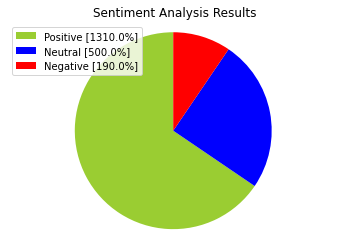

In [17]:
# Import Libraries
!pip install langdetect
from textblob import TextBlob
import sys
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

positive = 0
negative = 0
neutral = 0
polarity = 0

tweet_list = []
user_list = []
id_list = []

neutral_list = []
negative_list = []
positive_list = []

# tweets = tweepy.Cursor(api.search, q="airbnb",tweet_mode="extended",lang="en").items(10)

for index, row in df.iterrows():
    
    tweet_list.append(row['Tweet'])
    analysis = TextBlob(row['Tweet'])
    
    score = SentimentIntensityAnalyzer().polarity_scores(row['Tweet'])
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    
    polarity += analysis.sentiment.polarity
 
    if neg > pos:
        negative_list.append(row['Tweet'])
        negative += 1
    elif pos > neg:
        positive_list.append(row['Tweet'])
        positive += 1
    elif pos == neg:
        neutral_list.append(row['Tweet'])
        neutral += 1
        
noOfTweet = 10        
positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
user_list = pd.DataFrame(user_list)
id_list = pd.DataFrame(id_list)

neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

#Creating PieCart
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Results")
plt.axis('equal')
plt.show()

In [20]:
#Calculating Negative, Positive, Neutral and Compound values
tweet_list[['polarity','subjectivity']] = df['Tweet'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in df['Tweet'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        df.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        df.loc[index, 'sentiment'] = "positive"
    else:
        df.loc[index, 'sentiment'] = "neutral"
        df.loc[index, 'neg'] = neg
        df.loc[index, 'neu'] = neu
        df.loc[index, 'pos'] = pos
        df.loc[index, 'compound'] = comp


### Filter Negative reviews

In [21]:
df = df[df['sentiment']=='negative']

In [22]:
df

,Tweet,Datetime,Id,Name,sentiment,neg,neu,pos,compound
5,So freaking excited about this #airbnb bookin...,2021-11-15 05:09:34,1460112720951394305,TCJules,negative,NaN,NaN,NaN,NaN
15,RT @iamAMF: I tried calling the host but of co...,2021-11-15 03:22:16,1460085714507517954,Ilive4Purpose,negative,NaN,NaN,NaN,NaN
19,RT @iamAMF: I tried calling the host but of co...,2021-11-15 03:01:04,1460080381928034306,IvanKingz,negative,NaN,NaN,NaN,NaN
26,Threat to agents as #Airbnb takes bigger share...,2021-11-15 02:11:52,1460068000539807745,PropertyJourn,negative,NaN,NaN,NaN,NaN
38,"The world's largest accomodation provider, own...",2021-11-15 00:26:11,1460041405439483905,Vamsi_venkats,negative,NaN,NaN,NaN,NaN
50,"RT @60SecInvestor: ""Competition is really beco...",2021-11-14 23:58:26,1460034419817955330,kaithylienfx,negative,NaN,NaN,NaN,NaN
55,"Aloe is probably one of the most, if not THE m...",2021-11-14 22:55:42,1460018634038775811,YourHostJ,negative,NaN,NaN,NaN,NaN
56,I waited to see if @Airbnb was going to post m...,2021-11-14 22:42:12,1460015234291142659,iamAMF,negative,NaN,NaN,NaN,NaN
59,Horror fans can soon Airbnb the Scream house—c...,2021-11-14 22:33:05,1460012941428740096,Enterta23018559,negative,NaN,NaN,NaN,NaN
65,RT @karensgonewild_: Black man leases a house ...,2021-11-14 22:05:14,1460005934105698307,JesseAlling1,negative,NaN,NaN,NaN,NaN


### Retrieve replies for a given id/ negative review


In [23]:

# update these for the tweet you want to process replies to 'name' = the account username and you can find the tweet id within the tweet URL
name = 'missmira1122'
tweet_id = '1433277555591639048'

replies=[]
for tweet in tw.Cursor(api.search,q='to:'+name, result_type='recent', timeout=999999).items(1000):
    if hasattr(tweet, 'in_reply_to_status_id_str'):
        if (tweet.in_reply_to_status_id_str==tweet_id):
            replies.append(tweet.text)

replies

[]

In [ ]:
#This code creates the dataset from Corpus.csv which is downloadable from the
#internet well known dataset which is labeled manually by hand. But for the text
#of tweets you need to fetch them with their IDs.
import tweepy
import csv

# This method creates the training set
def createTrainingSet(corpusFile, targetResultFile):
    import csv
    import time

    counter = 0
    corpus = []

#     with open(corpusFile, 'r') as csvfile:
#         lineReader = csv.reader(csvfile, delimiter=',', quotechar="\"")
#         for row in lineReader:
#             corpus.append({"tweet_id": row[2], "label": row[1], "topic": row[0]})

    sleepTime = 2
    trainingDataSet = []

#     for tweet in corpus:
#         try:
#             tweetFetched = api.get_status(tweet["tweet_id"])
#             print("Tweet fetched" + tweetFetched.text)
#             tweet["text"] = tweetFetched.text
#             trainingDataSet.append(tweet)
#             time.sleep(sleepTime)

#         except:
#             print("Inside the exception - no:2")
#             continue

    # Collect tweets
    tweets = tw.Cursor(api.search,
                  q=search_words,
                  lang="en",
                  since=date_since).items(2000)

    airbnb_tweets = [[tweet.user.screen_name, tweet.user.location, tweet.id] for tweet in tweets]
    

    with open(targetResultFile, 'w') as csvfile:
        linewriter = csv.writer(csvfile, delimiter=',', quotechar="\"")
        for tweet in trainingDataSet:
            try:
                linewriter.writerow([tweet["tweet_id"], tweet["text"], tweet["label"], tweet["topic"]])
            except Exception as e:
                print(e)
    return trainingDataSet

# Code starts here
# This is corpus dataset
corpusFile = root+"Twitter_corpus.csv"
# This is my target file
targetResultFile = root+"Twitter_targetResultFile.csv"
# Call the method
resultFile = createTrainingSet(corpusFile, targetResultFile)